In [1]:
# use gpd_2023 environment

import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
#import seaborn as sns
import pickle
#import torch

import gc

import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [2]:
#local_dir = '/home/simon/Documents/Articles/ConflictNet/data/generated/'
#local_dir_raw = '/home/simon/Documents/Articles/ConflictNet/data/raw/'

#local_dir = '/home/number_one/Documents/scripts/conflictNet/data/generated'
#timelaps_dir = '/home/number_one/Documents/scripts/conflictNet/reports/timelapse/viewser_calib_sbnsos'


local_dir_gen = '/home/simon/Documents/scripts/conflictNet/data/generated'
local_dir_pro = '/home/simon/Documents/scripts/conflictNet/data/processed'
timelaps_dir = '/home/simon/Documents/scripts/conflictNet/reports/timelapse/feature'


#local_dir_raw = '/home/number_one/Documents/scripts/conflictNet/data/raw'

test_month = 48

with open(f'{local_dir_gen}/posterior_dict_48_calib.pkl', 'rb') as file:
    posterior_dict = pickle.load(file)

with open(f'{local_dir_gen}/test_vol_48_calib.pkl', 'rb') as file:
    test_vol = pickle.load(file)

with open(f'{local_dir_pro}/viewser_monthly_vol_calib_sbnsos.pkl', 'rb') as file: # /viewser_monthly_vol_test_sbnsos.pkl
    views_vol = pickle.load(file)


In [3]:
posterior_list = posterior_dict['posterior_list']
posterior_list_class = posterior_dict['posterior_list_class']
out_of_sample_vol = posterior_dict['out_of_sample_vol']

mean_class_pred = np.array(posterior_list_class[test_month]).mean(axis=0)
mean_pred = np.array(posterior_list[test_month]).mean(axis=0)

In [4]:
mean_class_pred.shape

(3, 180, 180)

In [5]:
#NOT USED YET BELOW!!!! 


def discard_ME_cells(un_masked_matrix, feature):

    # Hard coded...
    # For comparison with views 2020 where middle east is not included

    # 0 is ocean
    # You could load in the views replication data and get the c_id for only africa from there... More kosher
    middle_east_c_id = [
        0.0, 129.0, 130.0, 131.0, 128.0, 132.0, 133.0, 136.0, 55.0, 60.0, 62.0, 89.0,
        218.0, 92.0, 220.0, 94.0, 93.0, 96.0, 119.0, 122.0, 124.0, 125.0, 126.0, 127.0
    ]

    # Values to mask (0 and 1 in this example)
    values_to_mask = np.array(middle_east_c_id)

    # Create a mask for the specified values
    mask = np.isin(views_vol[-48, :, :, 4], values_to_mask)

    # Mask the array using the created mask
    masked_matrix = np.ma.masked_where(mask, un_masked_matrix[feature, :, :]) # [feature, :, :] is for the feature, i.e. type of violence

    # Get the 1D vector with masked-out values discarded
    #vector = masked_matrix.compressed()

    return masked_matrix#vector

masked_matrix = discard_ME_cells(mean_class_pred, 0)


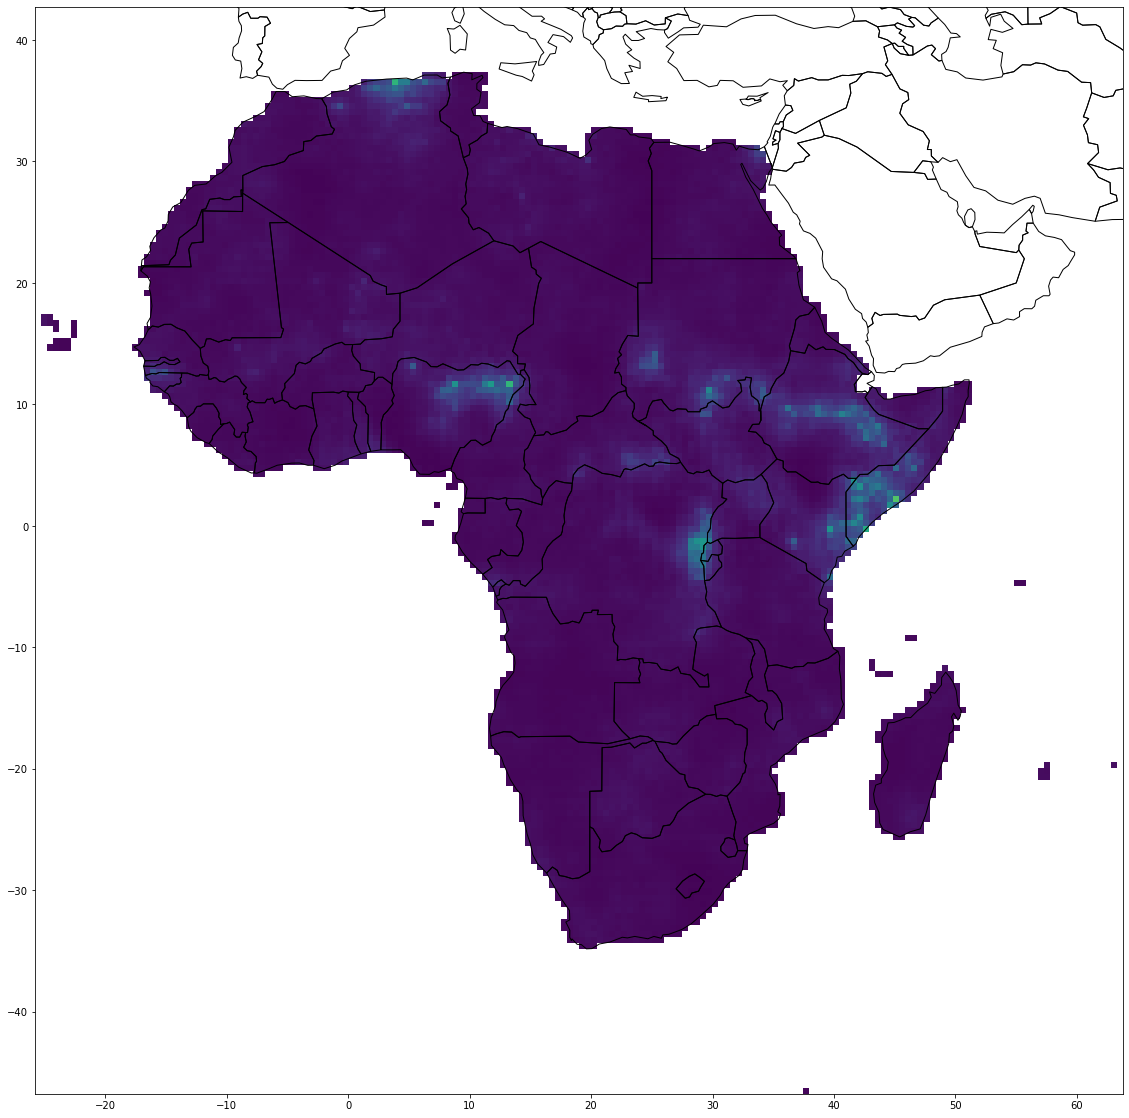

In [7]:

extent = (-25.75, 63.75, -46.75, 42.75)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(30, 20))

# Plot the world map
world.plot(ax=ax, color='none', edgecolor='black')

# Set vmin and vmax for the image
vmin = 0
vmax = 1


ax.imshow(masked_matrix, extent=extent, vmin=vmin, vmax=vmax)

plt.show()

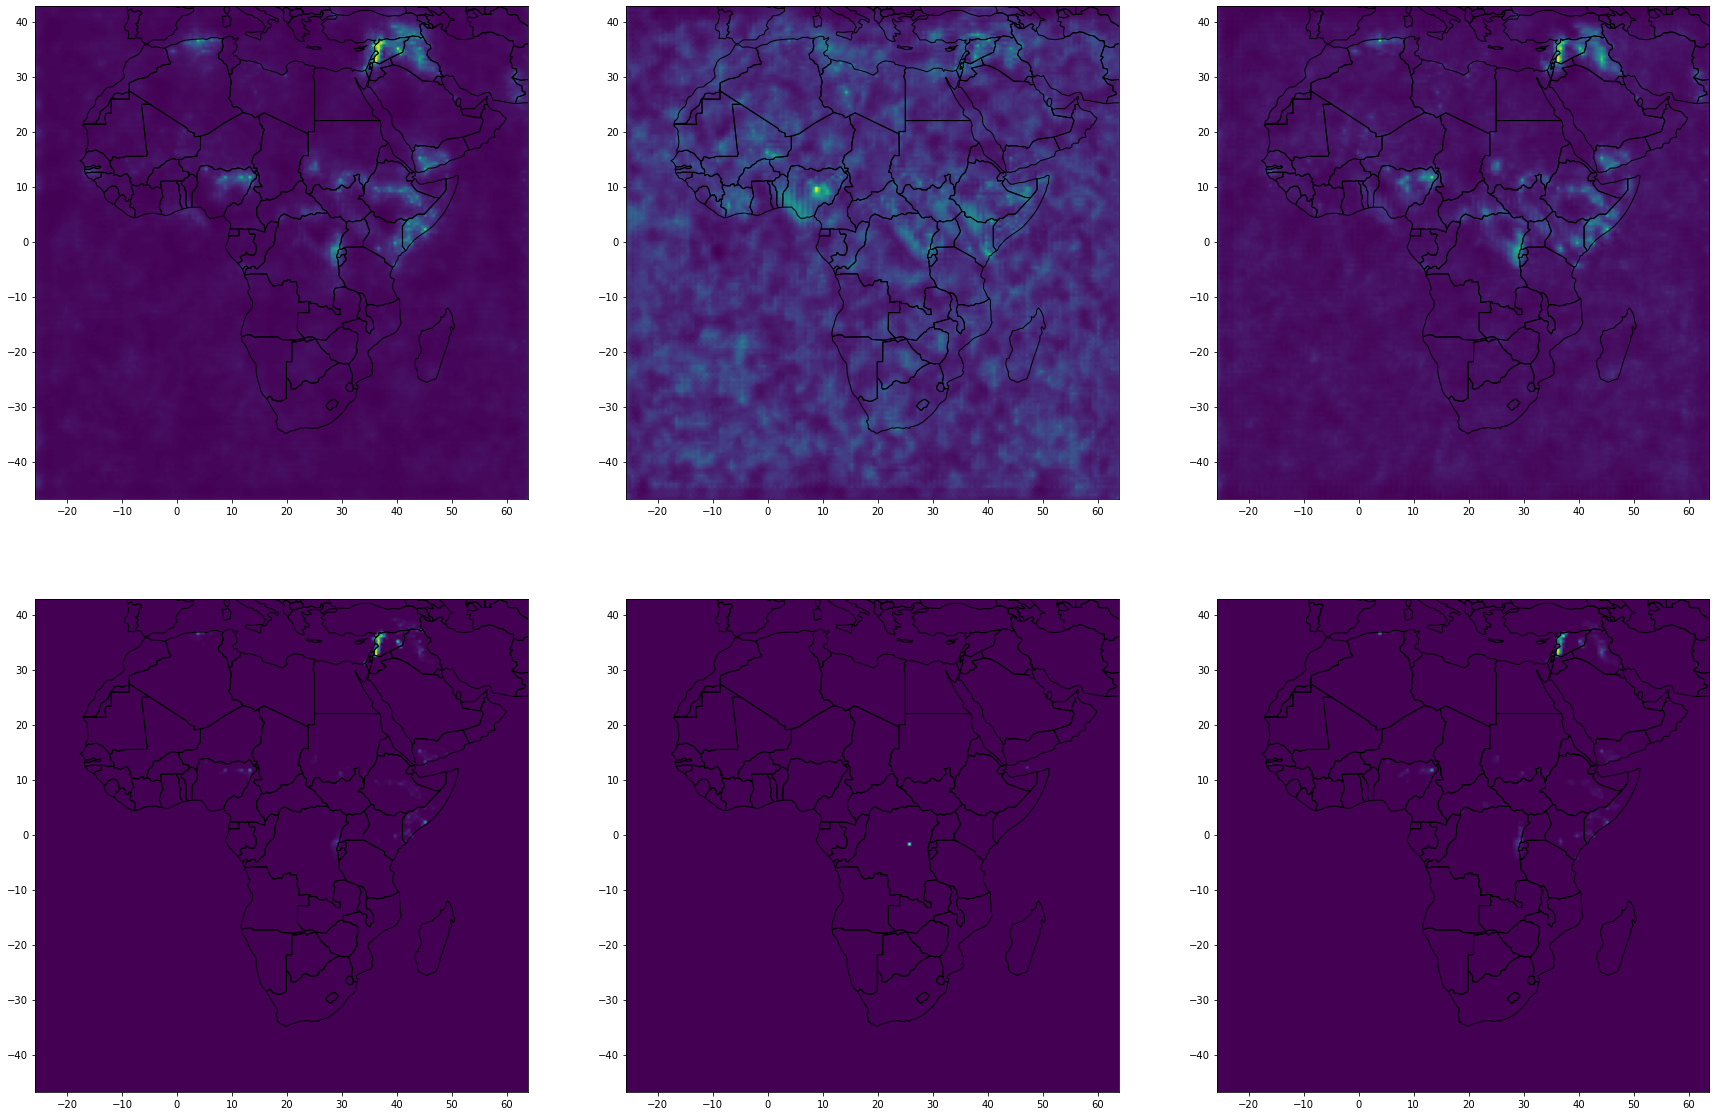

In [8]:
fig, axs = plt.subplots(2,3, )

# extent = (views_vol[:,:,:,1].min(), views_vol[:,:,:,1].max(), views_vol[:,:,:,2].min(), views_vol[:,:,:,2].max()) 
extent = (-25.75, 63.75, -46.75, 42.75)

fig.set_figheight(20)
fig.set_figwidth(30)

world.plot(ax = axs[0,0], color='none', edgecolor='black')
world.plot(ax = axs[0,1], color='none', edgecolor='black')
world.plot(ax = axs[0,2], color='none', edgecolor='black')
world.plot(ax = axs[1,0], color='none', edgecolor='black')
world.plot(ax = axs[1,1], color='none', edgecolor='black')
world.plot(ax = axs[1,2], color='none', edgecolor='black')

axs[0,0].imshow(mean_class_pred[0,:,:], extent = extent)
axs[0,1].imshow(mean_class_pred[1,:,:], extent = extent)
axs[0,2].imshow(mean_class_pred[2,:,:], extent = extent)
axs[1,0].imshow(mean_pred[0,:,:], extent = extent)
axs[1,1].imshow(mean_pred[1,:,:], extent = extent)
axs[1,2].imshow(mean_pred[2,:,:], extent = extent)

plt.show()

In [ ]:
# insert overall ap score.

def plt_trio(test_month, timelaps_dir, posterior_dict, feature_number):

    interpolation = 'none'

    # extent = (views_vol[:,:,:,1].min(), views_vol[:,:,:,1].max(), views_vol[:,:,:,2].min(), views_vol[:,:,:,2].max())
    extent = (-25.75, 63.75, -46.75, 42.75) # hardcode so you do not have to load views_vol

#    extent = (-100, 80, -100, 80) 


    posterior_list = posterior_dict['posterior_list']
    posterior_list_class = posterior_dict['posterior_list_class']
    out_of_sample_vol = posterior_dict['out_of_sample_vol']

    mean_class_pred = np.array(posterior_list_class[test_month]).mean(axis=0)[feature_number,:,:]
    mean_pred = np.array(posterior_list[test_month]).mean(axis=0)[feature_number,:,:]
    true_obs = out_of_sample_vol[:,test_month,:,:].squeeze()[feature_number,:,:]

    std_pred = np.array(posterior_list[test_month]).std(axis=0)[feature_number,:,:]

    # min/max for plotting
    min_true = out_of_sample_vol[:,0,:,:].min()
    max_true = out_of_sample_vol[:,0,:,:].max()
    min_pred = np.array(posterior_list).min()
    max_pred = np.array(posterior_list).max()
    min_pred_class = np.array(posterior_list_class).min()
    max_pres_class = np.array(posterior_list_class).max()

    min_pred_std = np.array(posterior_list).mean(axis=0).std(axis = 0).min()
    max_pred_std = np.array(posterior_list).mean(axis=0).std(axis = 0).max()

    all_abs_error = np.abs(out_of_sample_vol[:,0,:,:].squeeze() - np.array(posterior_list).mean(axis = 0))
    min_error = all_abs_error.min()
    max_error = all_abs_error.max()

    # abs error
    abs_error = np.abs(true_obs - mean_pred)


    # Confucsion
    threshold = 0.2 # there is a good way to do this... You have just forgotten it...

    binary_pred = (mean_class_pred > threshold) * 1 
    binary_true = (true_obs > 0)*1

    TP = ((binary_pred == 1) & (binary_true == 1)).astype('int')
    FP = ((binary_pred == 1) & (binary_true == 0)).astype('int')*2
    FN = ((binary_pred == 0) & (binary_true == 1)).astype('int')*3
    # TN = ((binary_pred == 0) & (binary_true == 0)).astype('int')*4


    confusion_map = TP + FP + FN #+ TN # TN per defualt 0

    # TN gray, TP green, FP blue, FN red
    colors = [ (0.5, 0.5, 0.5), (0, 1, 0), (0, 0, 1), (1, 0, 0)]  # R, G, B
    cmap_name = 'catagorical4'
    cat_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=4)

    # plot
    #plt.figure(figsize=[30,20])

    fig, axs = plt.subplots(2,3, sharey= True, sharex= True)
    
    fig.set_figheight(20)
    fig.set_figwidth(30)

    plt.subplots_adjust(wspace=-0.01, hspace=-0.2)

    axs[0,0].set_title(f'true, month {test_month}')
    true_obs_masked = true_obs # np.ma.masked_where((views_vol[-48,:,:,4] == 0), true_obs)
    world.plot(ax = axs[0,0], color='none', edgecolor='black')
    im = axs[0,0].imshow(true_obs_masked, cmap = 'rainbow', vmin= min_true, vmax=max_true, aspect= 'equal', interpolation = interpolation, extent = extent)
    plt.colorbar(im, ax = axs[0,0], shrink = 0.6, label = 'observed magnitude y, i.e. log(best)')

    axs[0,1].set_title(f'pred, month {test_month}')
    mean_pred_masked = mean_pred # np.ma.masked_where((views_vol[-48,:,:,4] == 0), mean_pred)
    world.plot(ax = axs[0,1],color='none', edgecolor='black', figsize = [25,25])
    im = axs[0,1].imshow(mean_pred_masked, cmap = 'rainbow', vmin= min_pred, vmax=max_pred, aspect= 'equal', interpolation = interpolation, extent = extent)
    plt.colorbar(im, ax = axs[0,1], shrink = 0.6, label = 'predictited magnitude, ŷ ')


    axs[0,2].set_title(f'pred class, month {test_month}')
    mean_class_pred_masked = mean_class_pred #np.ma.masked_where((views_vol[-48,:,:,4] == 0), mean_class_pred)
    world.plot(ax = axs[0,2],color='none', edgecolor='black', figsize = [25,25])
    im = axs[0,2].imshow(mean_class_pred_masked, cmap = 'rainbow', vmin= min_pred_class, vmax=max_pres_class, aspect= 'equal', interpolation = interpolation, extent = extent)
    plt.colorbar(im, ax = axs[0,2], shrink = 0.6, label = 'predictited probability, ỹ')


    axs[1,0].set_title(f'absolute error, month {test_month}')
    abs_error_masked = abs_error # abs_error np.ma.masked_where((views_vol[-48,:,:,4] == 0), abs_error)
    world.plot(ax = axs[1,0],color='none', edgecolor='black', figsize = [25,25])
    im = axs[1,0].imshow(abs_error_masked, cmap = 'rainbow', vmin=min_error, vmax=max_error, aspect= 'equal', interpolation = interpolation, extent = extent) # min and max are not constant here!
    plt.colorbar(im, ax = axs[1,0], shrink = 0.6, label = 'absolute error, |y-ŷ|')


    axs[1,1].set_title(f'pred std, month {test_month}')  # wonrg title
    std_pred_masked = std_pred #np.ma.masked_where((views_vol[-48,:,:,4] == 0), std_pred)
    world.plot(ax = axs[1,1],color='none', edgecolor='black', figsize = [25,25])
    im = axs[1,1].imshow(std_pred_masked, cmap = 'rainbow', vmin=min_pred_std, vmax=max_pred_std, aspect= 'equal', interpolation = interpolation, extent = extent)
    plt.colorbar(im, ax = axs[1,1], shrink = 0.6,  label = 'ensemble std (predicted magnitude, ŷ)')


    axs[1,2].set_title(f'confusion_map (T=0.2)pred std, month {test_month}')  # wonrg title
    confusion_map_masked = confusion_map # np.ma.masked_where((views_vol[-48,:,:,4] == 0), confusion_map)
    world.plot(ax = axs[1,2],color='none', edgecolor='black', figsize = [25,25])
    im = axs[1,2].imshow(confusion_map_masked, cmap = cat_cmap, vmin=0, vmax=3, aspect= 'equal', interpolation = interpolation, extent = extent)
    cbar = plt.colorbar(im, ax = axs[1,2], ticks = np.linspace(0.4,2.6,4), shrink = 0.6)
    cbar.set_ticklabels(['TN', 'TP', 'FP', 'FN'])

    #plt.subplots_adjust(hspace = -0.1, wspace = 0.1)

    fig_title = f'trio_{str(test_month).zfill(2)}'
    plt.savefig(timelaps_dir + str(feature_number) + '/' + fig_title + '.JPG', bbox_inches="tight")
    
    #plt.show()
    
    #plt.cla() # idk if this is also needed..
    #plt.clf() # idk if this is also needed..
    plt.close(fig) # so they do not display or take up mem
    #gc.collect()

In [ ]:
#plt_trio(0, timelaps_dir, posterior_dict, 0)

In [ ]:
#plt_trio(0, timelaps_dir, posterior_dict, 1)

In [ ]:
#plt_trio(0, timelaps_dir, posterior_dict, 2)

In [ ]:
for i in range(48):
    plt_trio(i, timelaps_dir, posterior_dict, 0)

In [ ]:
for i in range(48):
    plt_trio(i, timelaps_dir, posterior_dict, 1)

In [ ]:
for i in range(48):
    plt_trio(i, timelaps_dir, posterior_dict, 2)